In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(1)
x1 = np.absolute(np.random.randn(100, 1)*10)
x2 = np.absolute(np.random.randn(100, 1)*30)
y = 2*x1**2 + 3*x1 + 2 + np.random.randn(100, 1)*20

df = pd.DataFrame({"x1": x1.reshape(100,), "x2": x2.reshape(100,), "y": y.reshape(100,)}, index=range(0,100))
df

,x1,x2,y
0,16.243454,13.413857,570.412369
1,6.117564,36.735231,111.681987
2,5.281718,12.104749,62.392124
3,10.729686,17.807356,303.538953
4,8.654076,32.847355,151.109269
...,...,...,...
95,0.773401,48.823150,-0.430738
96,3.438537,18.069578,44.308720
97,0.435969,12.608466,19.383456
98,6.200008,24.328550,78.371729


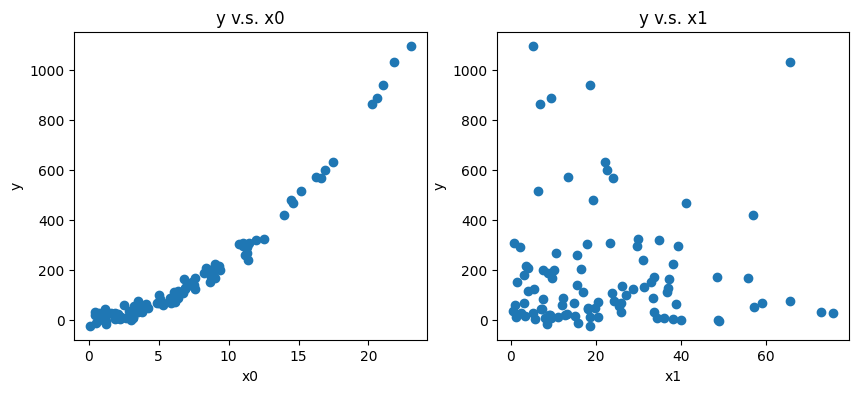

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].scatter(x1, y)
ax[1].scatter(x2, y)

for i in range(2):
    ax[i].set_title(f'y v.s. x{i}')
    ax[i].set_xlabel(f'x{i}')
    ax[i].set_ylabel('y')

plt.show()

In [4]:
X, y = df[["x1", "x2"]], df["y"]

poly = PolynomialFeatures(degree=2, include_bias=False)
#poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only = True)
poly_features = poly.fit_transform(X)

In [5]:
poly_features.shape

(100, 5)

In [6]:
feature_names = poly.get_feature_names_out()
print("Column names in poly_features:", feature_names)

Column names in poly_features: ['x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [8]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

## Check MSE

In [9]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

20.93770783907864

In [10]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_trainL, y_trainL)
lin_reg_y_predicted = lin_reg_model.predict(X_testL)
lin_reg_rmse = np.sqrt(mean_squared_error(y_testL, lin_reg_y_predicted))
lin_reg_rmse

62.30248745387846

## Check fitted equation

In [11]:
feature_names = poly.get_feature_names_out()

coefficients = poly_reg_model.coef_
intercept = poly_reg_model.intercept_

poly_string = f"{intercept:.2f}"

for i, coef in enumerate(coefficients):
    poly_string += f" + {coef:.2f} * {feature_names[i]}"

print("Fitted Polynomial Function: \n \t f(x1, x2) ~", poly_string)

Fitted Polynomial Function: 
 	 f(x1, x2) ~ 14.12 + 3.62 * x1 + -1.09 * x2 + 1.90 * x1^2 + 0.02 * x1 x2 + 0.01 * x2^2


### Check results

In [12]:
X_test.shape

(30, 5)

In [13]:
poly_reg_y_predicted

array([ 41.6350313 ,  39.42128746, 452.06683015, 110.51727736,
         2.65094349, 144.27230078, 185.75697454,  10.81034621,
       462.83508143, 566.27203227,  -5.53330574, 125.27478433,
       185.59939781, 168.88392753, 317.09608594, 171.92507502,
        22.91712564, 167.36531564,  28.04318899,  44.46072362,
        97.92748209,  13.34154912,   0.66046295, 131.74620326,
       431.8011814 , 270.05259063,  22.60712417,  34.93332853,
        33.95914936,  19.73818115])

In [14]:
i = 8
fitted_y = 14.12 + 3.62 * X_test[i][0] + -1.09 * X_test[i][1] + 1.90 * X_test[i][2] + 0.02 * X_test[i][3] + 0.01 * X_test[i][4]
true_y = list(y_test)[i]
print('fitted:', fitted_y)
print('true:', true_y)

fitted: 457.33663363825696
true: 466.8851720637676
